<a href="https://colab.research.google.com/github/ting-chih/CS5914-final-project/blob/main/Copy_of_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Convolutional autoencoder for image denoising

**Author:** [Santiago L. Valdarrama](https://twitter.com/svpino)<br>
**Date created:** 2021/03/01<br>
**Last modified:** 2021/03/01<br>
**Description:** How to train a deep convolutional autoencoder for image denoising.

## Introduction

This example demonstrates how to implement a deep convolutional autoencoder
for image denoising, mapping noisy digits images from the MNIST dataset to
clean digits images. This implementation is based on an original blog post
titled [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
by [François Chollet](https://twitter.com/fchollet).

## Setup

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
import os

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model


def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


## Prepare the data

/content/drive/MyDrive/100/1-O.jpg /content/drive/MyDrive/100/1-P.jpg
/content/drive/MyDrive/100/2-O.jpg /content/drive/MyDrive/100/2-P.jpg
/content/drive/MyDrive/100/3-O.jpg /content/drive/MyDrive/100/3-P.jpg
/content/drive/MyDrive/100/4-O.jpg /content/drive/MyDrive/100/4-P.jpg
/content/drive/MyDrive/100/5-O.jpg /content/drive/MyDrive/100/5-P.jpg
/content/drive/MyDrive/100/6-O.jpg /content/drive/MyDrive/100/6-P.jpg
/content/drive/MyDrive/100/7-O.jpg /content/drive/MyDrive/100/7-P.jpg
/content/drive/MyDrive/100/8-O.jpg /content/drive/MyDrive/100/8-P.jpg
/content/drive/MyDrive/100/9-O.jpg /content/drive/MyDrive/100/9-P.jpg
/content/drive/MyDrive/100/10-O.jpg /content/drive/MyDrive/100/10-P.jpg
/content/drive/MyDrive/100/11-O.jpg /content/drive/MyDrive/100/11-P.jpg
/content/drive/MyDrive/100/12-O.jpg /content/drive/MyDrive/100/12-P.jpg
/content/drive/MyDrive/100/13-O.jpg /content/drive/MyDrive/100/13-P.jpg
/content/drive/MyDrive/100/14-O.jpg /content/drive/MyDrive/100/14-P.jpg
/content/d

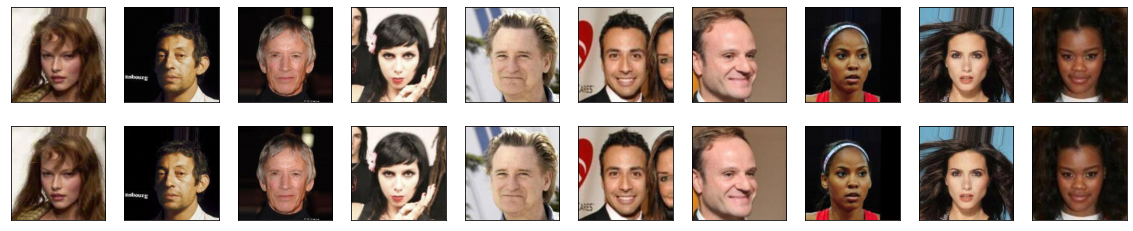

In [ ]:
def data_in_one(inputdata):
  min = np.nanmin(inputdata)
  max = np.nanmax(inputdata)
  output = (inputdata-min)/(max-min)
  return output

# Since we only need images from the dataset to encode and decode, we

# won't use the labels.
dirname = '/content/drive/MyDrive/200/'
list = os.listdir(dirname)
root = []
#oriSet = np.
perSet = []
oriSet = []
for k in range(0, len(list)):
    root.append(dirname + list[k])
    count = 0
for k in range(1, 202):
    oriName = str(k) + "-O.jpg"
    perName = str(k) + "-Images.jpg"
    if (oriName in list and perName in list):
            oriFile = dirname + oriName
            perFile = dirname + perName
            print(oriFile, perFile)
            origin = Image.open(oriFile)
            perturb = Image.open(perFile)
            oriArray = asarray(origin)
            perArray = asarray(perturb)
            #print(perArray)
            #print(perArray.shape)
            #oriSet = np.concatenate(oriSet, oriArray)
            #np.concatenate(perSet, perArray)
            oriSet.append(oriArray)
            perSet.append(perArray)
#print(oriSet)
print("---------------------------")
#(x_train, _), (x_test, _) = mnist.load_data()
#print(x_train)
#print(x_train.shape)
# Normalize and reshape the data
perSet = np.array(perSet)
oriSet = np.array(oriSet)

perSet = data_in_one(perSet)
oriSet = data_in_one(oriSet)
#train_data = preprocess(perSet)
#test_data = preprocess(oriSet)

# # Create a copy of the data with added noise
# noisy_train_data = noise(train_data)
# noisy_test_data = noise(test_data)

# # Display the train data and a version of it with added noise
display(perSet, oriSet)

## Build the autoencoder

We are going to use the Functional API to build our convolutional autoencoder.

In [ ]:
input = layers.Input(shape=(256, 256, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_transpose_10 (Conv2D  (None, 128, 128, 32)     9248

Now we can train our autoencoder using `train_data` as both our input data
and target. Notice we are setting up the validation data using the same
format.

In [ ]:
autoencoder.fit(
    x=perSet,
    y=oriSet,
    epochs=500,
    batch_size=64,
    shuffle=True,
    #validation_data=(perSet, oriSet),
)

Epoch 1/500
2/2 [==============================] - 1s 153ms/step - loss: 0.4935
Epoch 2/500
2/2 [==============================] - 0s 154ms/step - loss: 0.4933
Epoch 3/500
2/2 [==============================] - 0s 159ms/step - loss: 0.4932
Epoch 4/500
2/2 [==============================] - 0s 158ms/step - loss: 0.4931
Epoch 5/500
2/2 [==============================] - 0s 154ms/step - loss: 0.4930
Epoch 6/500
2/2 [==============================] - 0s 158ms/step - loss: 0.4929
Epoch 7/500
2/2 [==============================] - 0s 156ms/step - loss: 0.4928
Epoch 8/500
2/2 [==============================] - 0s 162ms/step - loss: 0.4927
Epoch 9/500
2/2 [==============================] - 0s 155ms/step - loss: 0.4925
Epoch 10/500
2/2 [==============================] - 0s 158ms/step - loss: 0.4923
Epoch 11/500
2/2 [==============================] - 0s 158ms/step - loss: 0.4922
Epoch 12/500
2/2 [==============================] - 0s 159ms/step - loss: 0.4922
Epoch 13/500
2/2 [===================

Let's predict on our test dataset and display the original image together with
the prediction from our autoencoder.

Notice how the predictions are pretty close to the original images, although
not quite the same.

4/4 [==============================] - 0s 66ms/step


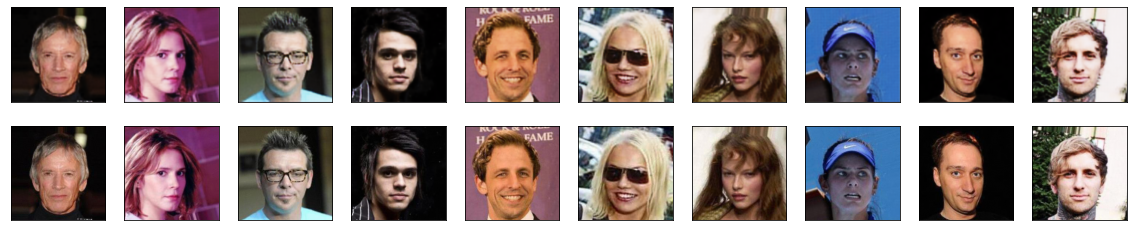

In [ ]:
predictions = autoencoder.predict(perSet)
display(predictions, perSet)


Now that we know that our autoencoder works, let's retrain it using the noisy
data as our input and the clean data as our target. We want our autoencoder to
learn how to denoise the images.

In [ ]:
root = '000'
for k in range(0, 200):
    if k < 10:
      oriName = root+ "00" + str(k)
    elif k >= 10 && k <= 99:
      oriName = root + "0" + str(k)
    else: 
      oriName = root + str(k)
    oriName = oriName + ".jpg"
    #oriName = str(k) + "-R.jpg"
    currImg = Image.fromarray((predictions[k] * 255).astype(np.uint8))
    savepath = '/content/results/' + oriName
    currImg.save(savepath)

In [ ]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0998 - val_loss: 0.0930
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0927 - val_loss: 0.0911
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0913 - val_loss: 0.0901
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0904 - val_loss: 0.0893
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0897 - val_loss: 0.0887
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0892 - val_loss: 0.0883
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0887 - val_loss: 0.0880
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0883 - val_loss: 0.0876
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0880 - val_loss: 0.0873
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0877 - val_lo

Let's now predict on the noisy data and display the results of our autoencoder.

Notice how the autoencoder does an amazing job at removing the noise from the
input images.

313/313 [==============================] - 1s 2ms/step


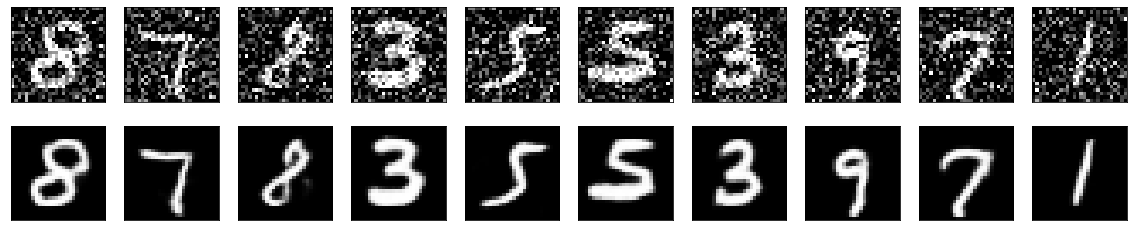

In [ ]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)